In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split

income = pd.read_csv("/content/Kor_income.csv", na_values=[' ']) #공백을 결측치로 인식
submission = pd.read_csv("/content/submission.csv", na_values=[' '])

##1. 데이터 확인

In [2]:
income.head()

,Unnamed: 0,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,77530,68460101,2005,1,3,1,2,1940,2,2,1,617.0,1.0,NaN,460.0
1,67016,59620101,2018,14,4,3,1,1939,5,1,2,NaN,NaN,9.0,1713.0
2,38931,35960101,2012,8,2,3,1,1967,6,3,1,510.0,1.0,NaN,2854.0
3,72033,63870101,2011,7,4,5,1,1947,3,1,1,611.0,1.0,NaN,4290.0
4,21862,20620101,2017,13,4,2,1,1940,2,1,2,NaN,NaN,10.0,1608.0


In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78928 entries, 0 to 78927
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          78928 non-null  int64  
 1   id                  78928 non-null  int64  
 2   year                78928 non-null  int64  
 3   wave                78928 non-null  int64  
 4   region              78928 non-null  int64  
 5   family_member       78928 non-null  int64  
 6   gender              78928 non-null  int64  
 7   year_born           78928 non-null  int64  
 8   education_level     78928 non-null  int64  
 9   marriage            78928 non-null  int64  
 10  religion            78928 non-null  int64  
 11  occupation          50276 non-null  float64
 12  company_size        50277 non-null  float64
 13  reason_none_worker  27395 non-null  float64
 14  income              78928 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 9.0 MB


In [4]:
income['occupation'] = pd.to_numeric(income['occupation'])
income['company_size'] = pd.to_numeric(income['company_size'])
income['reason_none_worker'] = pd.to_numeric(income['reason_none_worker'])

##2. 열 drop

*   wave
*   첫 번째 열
*   id

In [5]:
income.drop(['wave'], inplace=True, axis=1) #year과 완전 같은 자료
income.drop('Unnamed: 0', inplace=True, axis=1)
income.drop('id', inplace=True, axis=1)

##3. 열 추가

In [6]:
income['age'] = income['year']-income['year_born']
income.drop('year_born', inplace=True, axis=1) #age열 추가로 year_born 열 drop

In [7]:
import numpy as np

# 'job' 열을 추가하고 초기값으로 -1로 설정합니다.
income['job'] = -1

# 'reason_none_worker' 열이 공백이 아니면 해당 행의 'job' 열 값을 0으로 설정합니다.
income.loc[income['reason_none_worker'].notna(), 'job'] = 0

# 'occupation' 열이 공백이 아니면 해당 행의 'job' 열 값을 1로 설정합니다.
income.loc[income['occupation'].notna(), 'job'] = 1

# 'job' 열이 -1인 행을 찾아 가장 빈도가 높은 값으로 대체합니다.
income.loc[income['job'] == -1, 'job'] = income['job'].mode().iloc[0]


##4. 이상치 처리

1) income

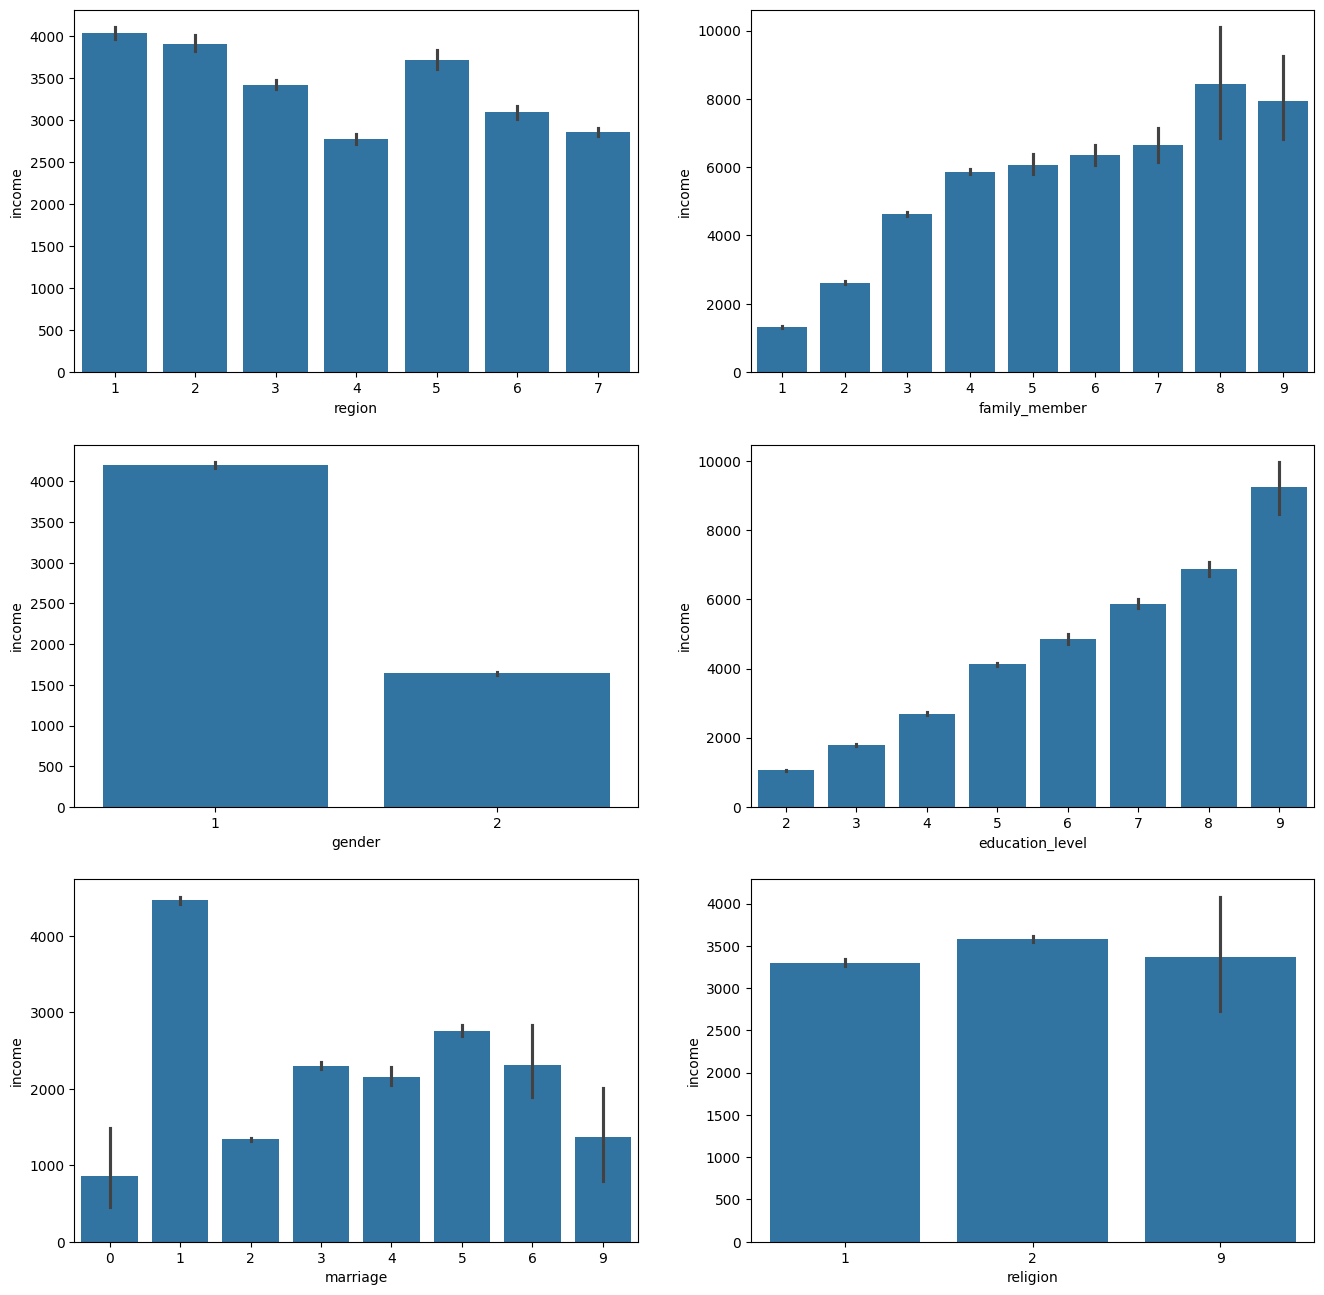

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
sns.barplot(x='region', y='income',data=income)

plt.subplot(3,2,2)
sns.barplot(x='family_member', y='income', data=income)

plt.subplot(3,2,3)
sns.barplot(x='gender', y='income',data=income)

plt.subplot(3,2,4)
sns.barplot(x='education_level', y='income', data=income)

plt.subplot(3,2,5)
sns.barplot(x='marriage', y='income', data=income)

plt.subplot(3,2,6)
sns.barplot(x='religion', y='income', data=income)

plt.show()

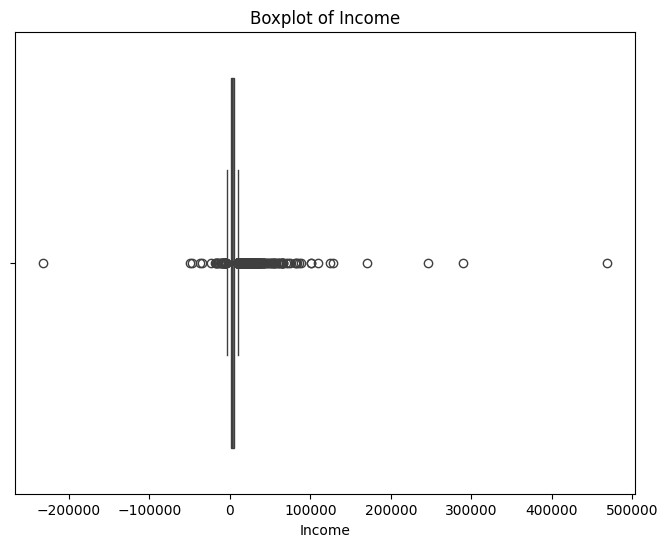

In [9]:
# Boxplot 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data=income, x='income')
plt.xlabel('Income')
plt.title('Boxplot of Income')
plt.show()

In [10]:
(income.income < 0).sum()

161

In [11]:
# 50000단위로 구간 나누기
bins = np.arange(0, income['income'].max() + 50000, 50000)

# 구간별 히스토그램 계산
histogram = pd.cut(income['income'], bins=bins).value_counts().sort_index()

print("50000단위 구간에 속한 행의 개수:")
print(histogram)

50000단위 구간에 속한 행의 개수:
(0.0, 50000.0]          78698
(50000.0, 100000.0]        29
(100000.0, 150000.0]        5
(150000.0, 200000.0]        1
(200000.0, 250000.0]        1
(250000.0, 300000.0]        1
(300000.0, 350000.0]        0
(350000.0, 400000.0]        0
(400000.0, 450000.0]        0
(450000.0, 500000.0]        1
Name: income, dtype: int64


In [12]:
#'income' 열에서 값이 0 미만인 행 선택
outliers_index = income[income['income'] < 0].index

# 'income' 열에서 값이 150,000 이상인 행 수 선택
high_income_index = income[income['income'] >= 150000].index

#선택된 행 삭제
income = income.drop(outliers_index)
income = income.drop(high_income_index)

In [13]:
#실질 임금을 log scale 변환
income['log_income'] = np.log(income.income +1 ) #0인 수 로그 취할 때 오류 안 가게 하기 위함

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 종속 변수인 log_income 열 스케일링
income['scaled_log_income'] = scaler.fit_transform(income[['log_income']])

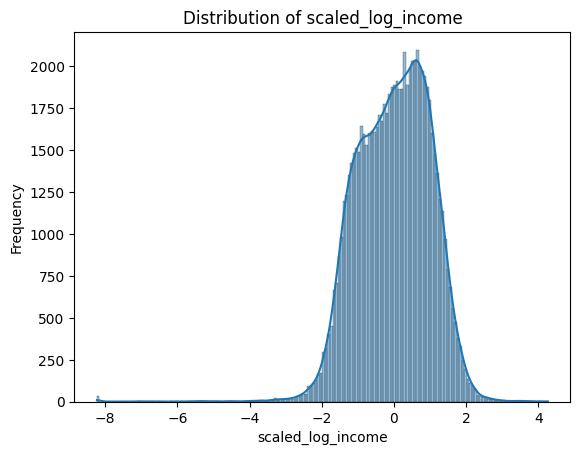

In [14]:
#히스토그램
sns.histplot(data=income, x='scaled_log_income', kde=True)
plt.xlabel('scaled_log_income')
plt.ylabel('Frequency')
plt.title('Distribution of scaled_log_income')
plt.show()

2) marriage
*   0, 9가 결측치
*   0 -> 13개, 9-> 7개

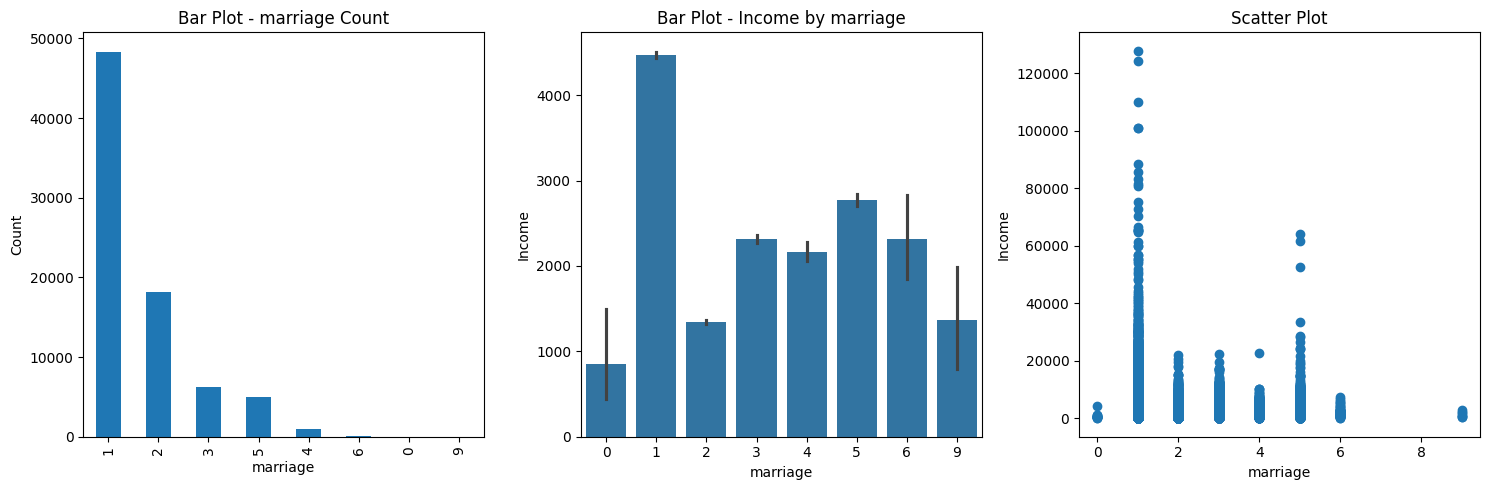

In [15]:
#marriage
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['marriage'].value_counts().plot.bar()
plt.xlabel('marriage')
plt.ylabel('Count')
plt.title('Bar Plot - marriage Count')

plt.subplot(1, 3, 2)
sns.barplot(x='marriage', y='income', data=income)
plt.xlabel('marriage')
plt.ylabel('Income')
plt.title('Bar Plot - Income by marriage')

plt.subplot(1, 3, 3)
plt.scatter(income['marriage'], income['income'])
plt.xlabel('marriage')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

In [16]:
# 0, 9를 6(other)으로 할당
income.loc[income['marriage'] == 9, 'marriage'] =6
income.loc[income['marriage'] == 0, 'marriage'] =6

3) religion
*   9가 결측치: 기타

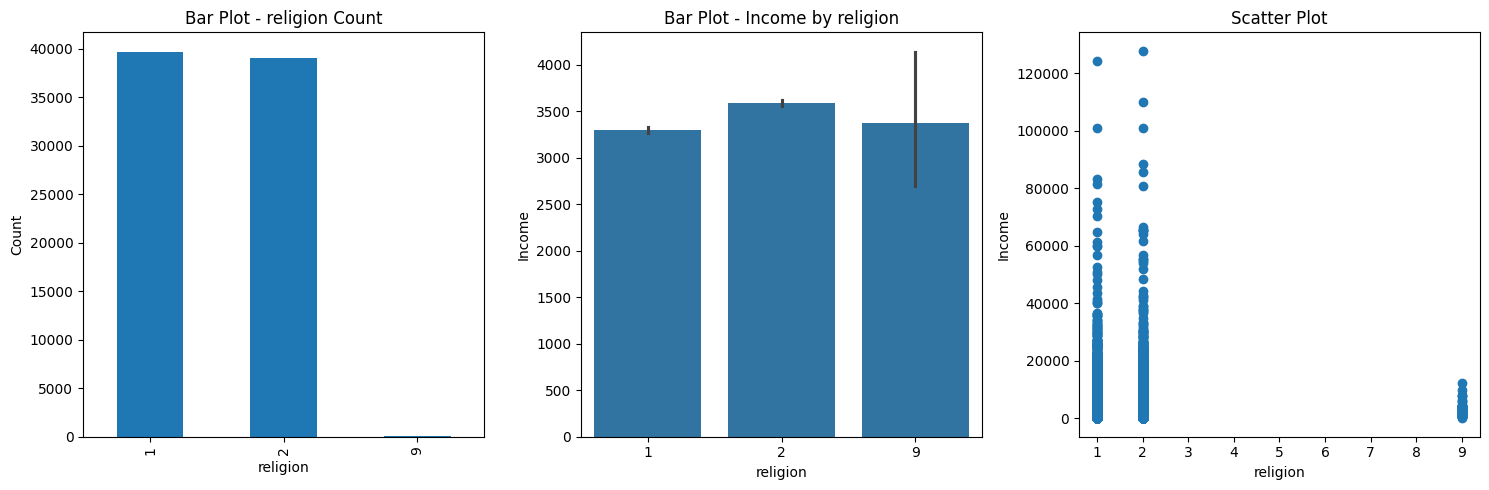

In [17]:
#religion
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['religion'].value_counts().plot.bar()
plt.xlabel('religion')
plt.ylabel('Count')
plt.title('Bar Plot - religion Count')

plt.subplot(1, 3, 2)
sns.barplot(x='religion', y='income', data=income)
plt.xlabel('religion')
plt.ylabel('Income')
plt.title('Bar Plot - Income by religion')

plt.subplot(1, 3, 3)
plt.scatter(income['religion'], income['income'])
plt.xlabel('religion')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

In [18]:
print(income.loc[income['religion'].isin([1]), 'income'].mean())
print(income.loc[income['religion'].isin([2]), 'income'].mean())
print(income.loc[income['religion'].isin([9]), 'income'].mean())

3296.01556374548
3590.63155609811
3373.2340425531916


In [19]:
income.loc[income['religion'] == 9, 'religion'] =1 #평균치가 비슷한 것으로 변환

4) education level

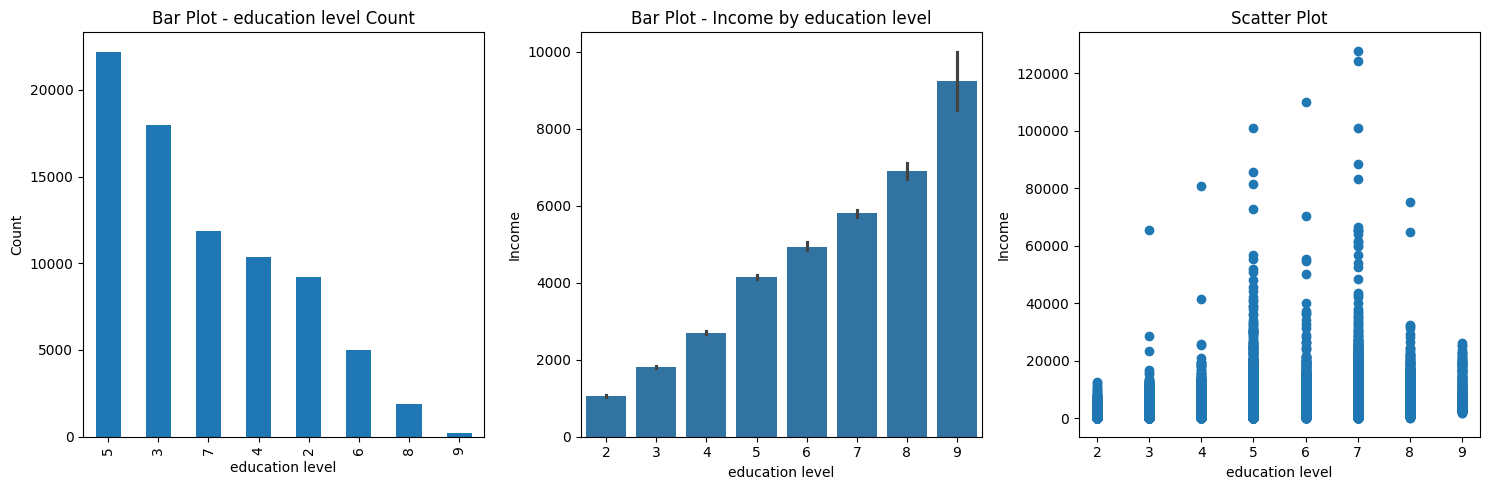

In [20]:
#education_level
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['education_level'].value_counts().plot.bar()
plt.xlabel('education level')
plt.ylabel('Count')
plt.title('Bar Plot - education level Count')

plt.subplot(1, 3, 2)
sns.barplot(x='education_level', y='income', data=income)
plt.xlabel('education level')
plt.ylabel('Income')
plt.title('Bar Plot - Income by education level')

plt.subplot(1, 3, 3)
plt.scatter(income['education_level'], income['income'])
plt.xlabel('education level')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

In [21]:
income.loc[income['education_level'] == 1, 'education_level'] = 2 #1과 2는 학력 없음

# 'education_level' 열에서 8 이상의 값을 '8이상'으로 묶어서 새로운 열을 추가합니다.
income['new_education_level'] = income['education_level'].apply(lambda x: '8이상' if x >= 8 else str(x))

# '8이상'으로 묶인 값들을 카운트합니다.
print(income['new_education_level'].value_counts())

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'new_family_member' 열에 대해 라벨 인코딩을 수행
income['encoded_education_level'] = label_encoder.fit_transform(income['new_education_level'])

income.drop('education_level', inplace=True, axis=1)
income.drop('new_education_level', inplace=True, axis=1)
#0=(1,2), 1=3, 2=4, 3=5(고졸), 4=6, 5=7(학사졸업), 6이상=8(석사 이상)

5      22204
3      17973
7      11882
4      10348
2       9234
6       5013
8이상     2109
Name: new_education_level, dtype: int64


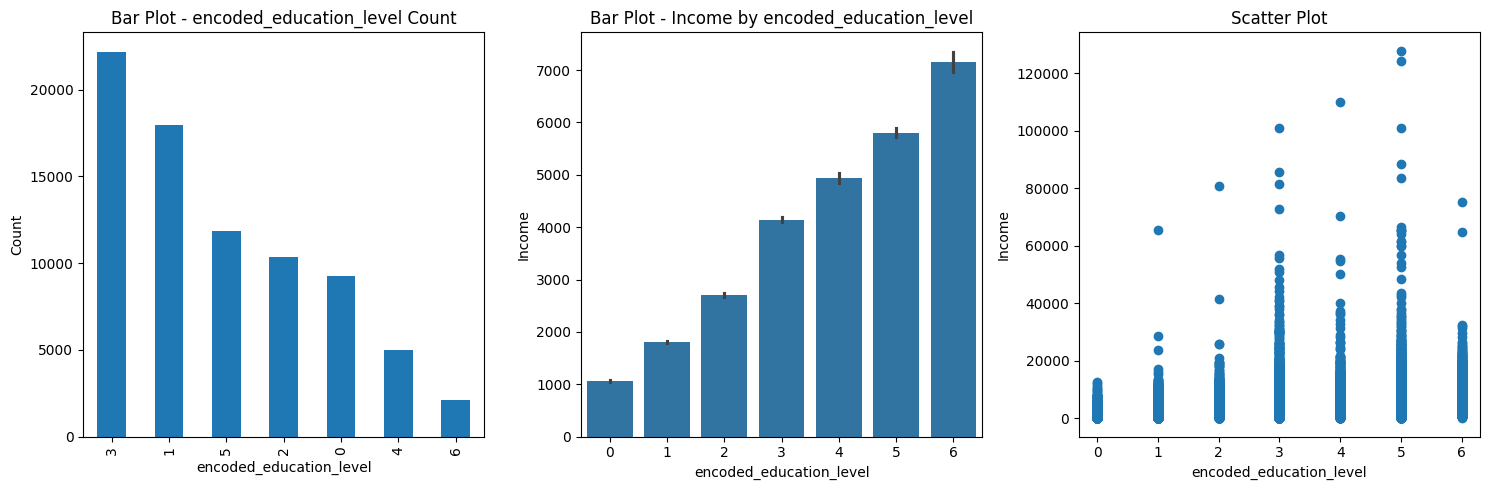

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['encoded_education_level'].value_counts().plot.bar()
plt.xlabel('encoded_education_level')
plt.ylabel('Count')
plt.title('Bar Plot - encoded_education_level Count')

plt.subplot(1, 3, 2)
sns.barplot(x='encoded_education_level', y='income', data=income)
plt.xlabel('encoded_education_level')
plt.ylabel('Income')
plt.title('Bar Plot - Income by encoded_education_level')

plt.subplot(1, 3, 3)
plt.scatter(income['encoded_education_level'], income['income'])
plt.xlabel('encoded_education_level')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

5) occupation

In [23]:
income['occupation'] = income['occupation'].apply(lambda x: int(x / 100) if not pd.isna(x) else np.nan)

<Axes: xlabel='occupation', ylabel='income'>

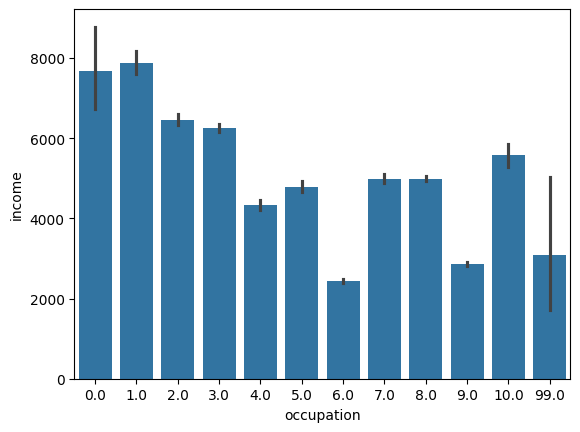

In [24]:
sns.barplot(x=income.occupation, y= income.income)

In [25]:
#99와 9의 임금 평균이 비슷하므로 99를 9로 변경
income.loc[income['occupation'] == 99.0, 'occupation'] = 9

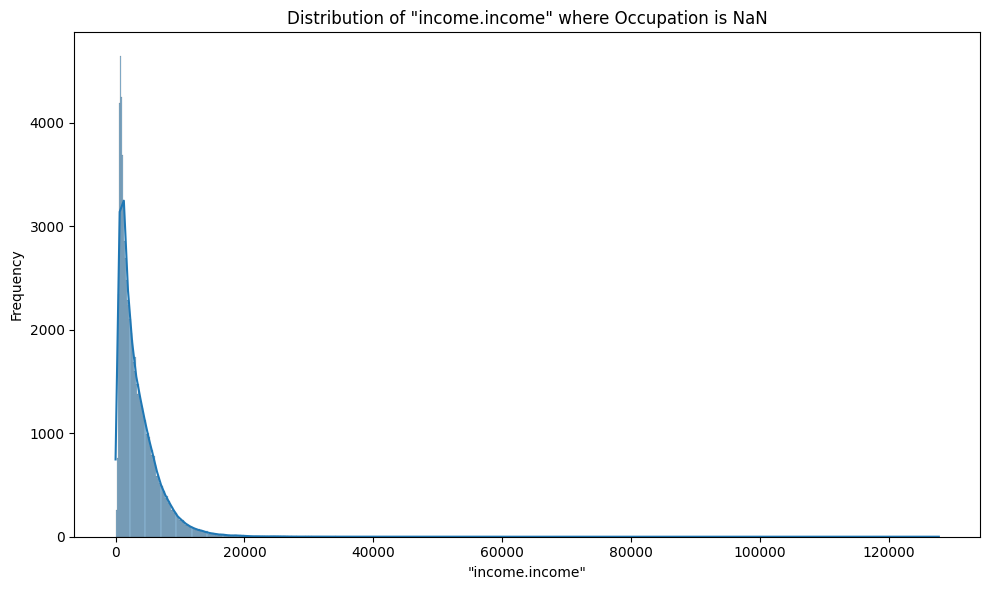

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where 'occupation' is NaN
nan_occupation_df = income[income['occupation'].isna()]

# Visualize the 'income.income' values where 'occupation' is NaN
plt.figure(figsize=(10, 6))
sns.histplot(data=nan_occupation_df, x=income.income, kde=True)
plt.title('Distribution of "income.income" where Occupation is NaN')
plt.xlabel('"income.income"')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [27]:
# Create an empty dictionary to store the average income for each occupation
average_income_by_occupation = {}

# Iterate over unique integer values in the 'income.occupation' column (0 to 11)
for occupation_value in range(12):
    # Filter rows where 'income.occupation' matches the current value
    occupation_df = income[income['occupation'] == occupation_value]
    # Calculate the mean of 'income' for the current occupation value
    mean_income = occupation_df['income'].mean()
    # Store the mean income in the dictionary
    average_income_by_occupation[occupation_value] = mean_income

# Sort the dictionary by average income values in ascending order
sorted_average_income_by_occupation = sorted(average_income_by_occupation.items(), key=lambda x: x[1])

# Print the sorted dictionary
for occupation_value, mean_income in sorted_average_income_by_occupation:
    print(f"Occupation: {occupation_value}, Average Income: {mean_income}")

Occupation: 6, Average Income: 2445.2345147933756
Occupation: 9, Average Income: 2863.1077307593823
Occupation: 4, Average Income: 4325.880948995
Occupation: 5, Average Income: 4793.912057917946
Occupation: 8, Average Income: 4993.176553618808
Occupation: 7, Average Income: 4994.821256364082
Occupation: 10, Average Income: 5571.413934426229
Occupation: 3, Average Income: 6247.6083489808025
Occupation: 2, Average Income: 6461.274563282041
Occupation: 0, Average Income: 7690.256349054725
Occupation: 1, Average Income: 7886.728325051941
Occupation: 11, Average Income: nan


In [28]:
income.loc[income['occupation'].isna(), 'income'].mean()
income.loc[income['occupation'].isna(), 'income'] = 11 #평균과 제일 유사

<Axes: xlabel='occupation', ylabel='income'>

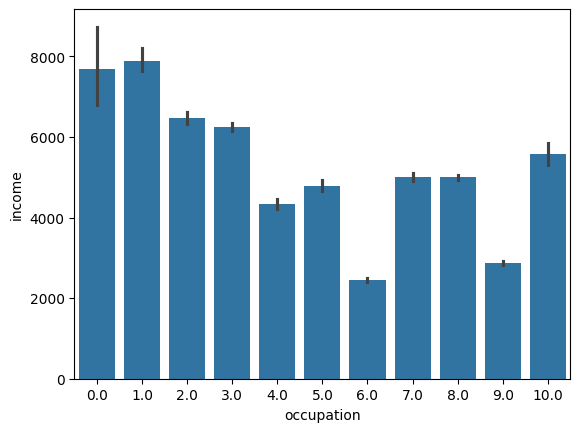

In [29]:
sns.barplot(x=income.occupation, y= income.income)

6) reason none worker

In [30]:
income.drop('reason_none_worker', inplace=True, axis=1)

7) company size

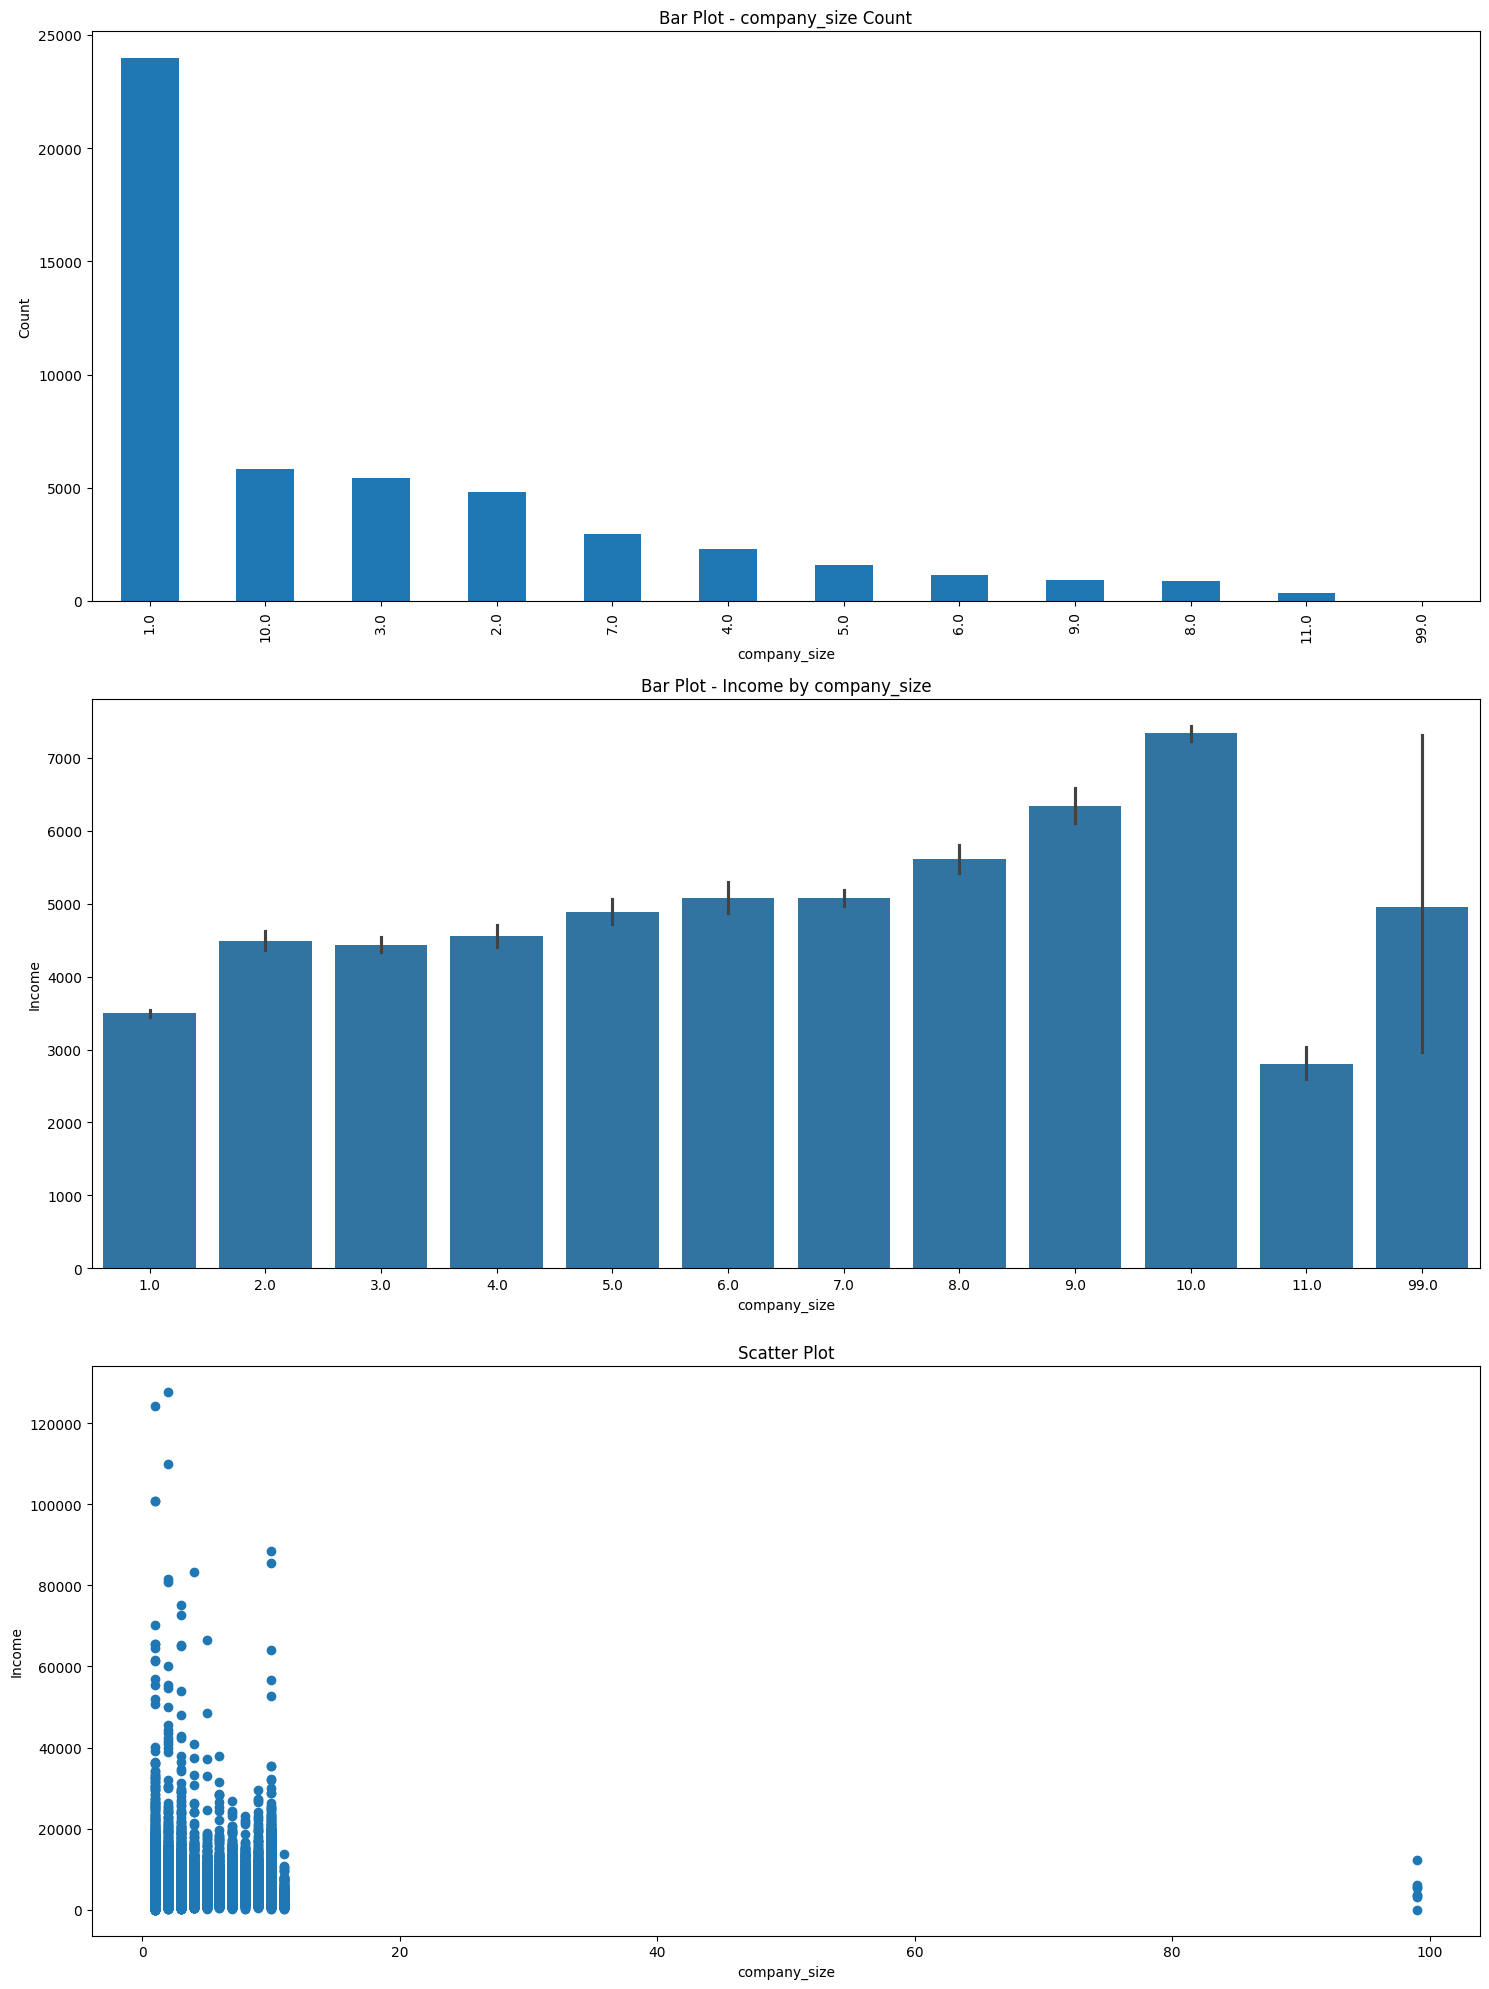

In [31]:
plt.figure(figsize=(15, 20))

plt.subplot(3, 1, 1)
income['company_size'].value_counts().plot.bar()
plt.xlabel('company_size')
plt.ylabel('Count')
plt.title('Bar Plot - company_size Count')

plt.subplot(3, 1, 2)
sns.barplot(x='company_size', y='income', data=income)
plt.xlabel('company_size')
plt.ylabel('Income')
plt.title('Bar Plot - Income by company_size')

plt.subplot(3, 1, 3)
plt.scatter(income['company_size'], income['income'])
plt.xlabel('company_size')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

In [32]:
income.company_size = income.company_size.replace(99.0, 7)
# company_size 열이 NaN인 행 필터링
nan_company_size = income[income['company_size'].isnull()]

# NaN인 행들의 income 평균 계산
average_income_nan_company_size = nan_company_size['income'].mean()

# 결과 출력
print("NaN인 company_size에 해당하는 행들의 income 평균:", average_income_nan_company_size)

income['company_size'].fillna(11, inplace=True)

NaN인 company_size에 해당하는 행들의 income 평균: 11.0


8) family member

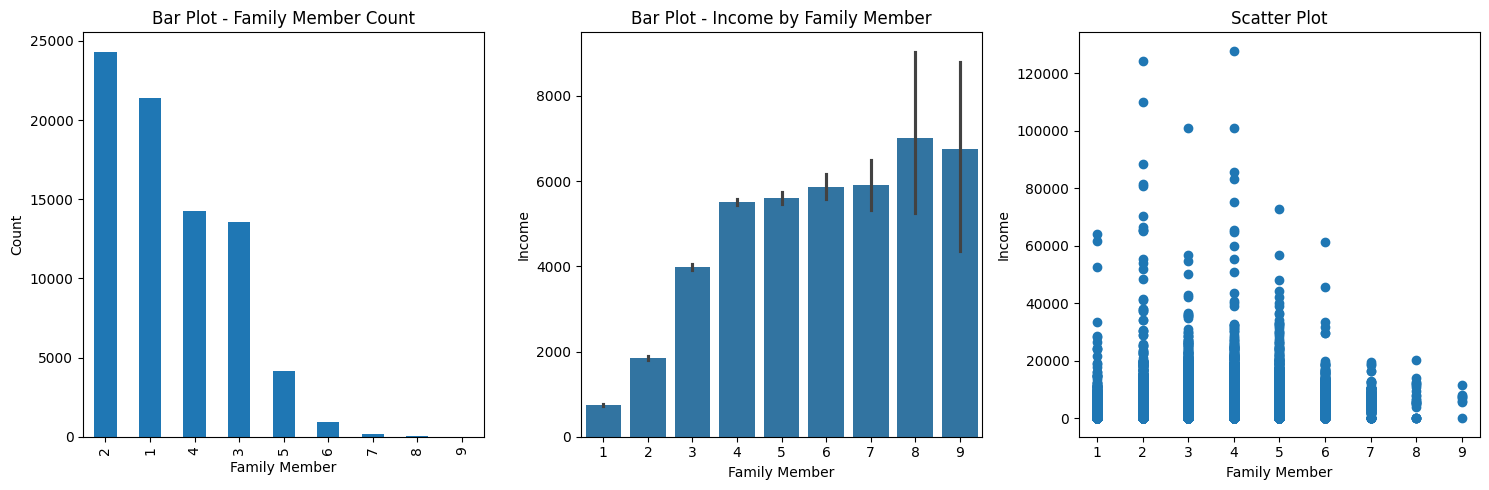

In [33]:
#family_member
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['family_member'].value_counts().plot.bar()
plt.xlabel('Family Member')
plt.ylabel('Count')
plt.title('Bar Plot - Family Member Count')

plt.subplot(1, 3, 2)
sns.barplot(x='family_member', y='income', data=income)
plt.xlabel('Family Member')
plt.ylabel('Income')
plt.title('Bar Plot - Income by Family Member')

plt.subplot(1, 3, 3)
plt.scatter(income['family_member'], income['income'])
plt.xlabel('Family Member')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

In [34]:
# 'family_member' 열에서 5 이상의 값을 '5이상'으로 묶어서 새로운 열을 추가합니다.
income['new_family_member'] = income['family_member'].apply(lambda x: '5이상' if x >= 5 else str(x))

# '5이상'으로 묶인 값들을 카운트합니다.
print(income['new_family_member'].value_counts())

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'new_family_member' 열에 대해 라벨 인코딩을 수행
income['encoded_family_member'] = label_encoder.fit_transform(income['new_family_member'])

income.drop('family_member', inplace=True, axis=1)
income.drop('new_family_member', inplace=True, axis=1)
#0:1명, 1:2명, 2:3명, 3:4명, 4:5명 이상으로 인코딩 (5명 이상은 각 빈도수가 매우 적어서 이들끼리만 하나로 묶음)

2      24321
1      21360
4      14263
3      13557
5이상     5262
Name: new_family_member, dtype: int64


9) region

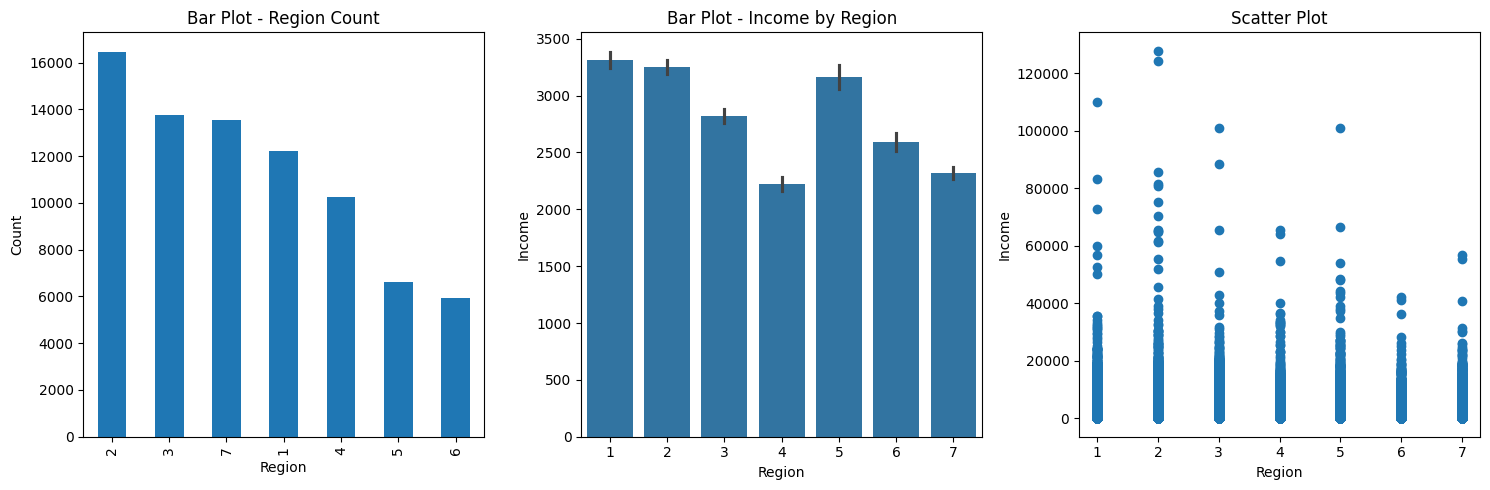

In [35]:
#region
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['region'].value_counts().plot.bar()
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Bar Plot - Region Count')

plt.subplot(1, 3, 2)
sns.barplot(x='region', y='income', data=income)
plt.xlabel('Region')
plt.ylabel('Income')
plt.title('Bar Plot - Income by Region')

plt.subplot(1, 3, 3)
plt.scatter(income['region'], income['income'])
plt.xlabel('Region')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

10) age

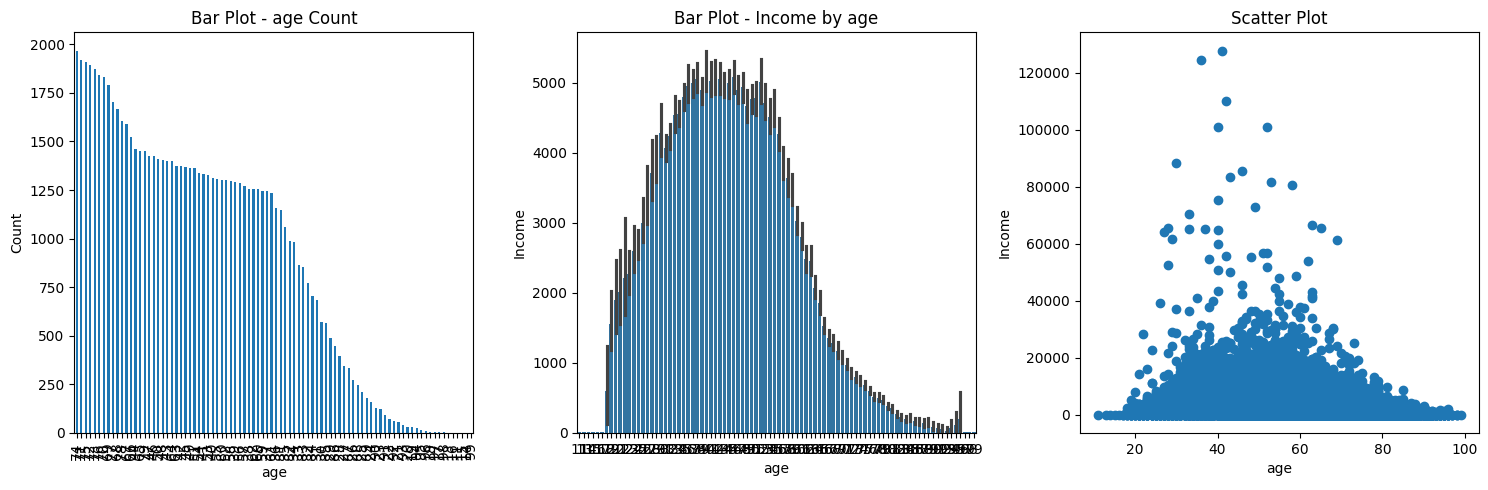

In [36]:
#age
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['age'].value_counts().plot.bar()
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Bar Plot - age Count')

plt.subplot(1, 3, 2)
sns.barplot(x='age', y='income', data=income)
plt.xlabel('age')
plt.ylabel('Income')
plt.title('Bar Plot - Income by age')

plt.subplot(1, 3, 3)
plt.scatter(income['age'], income['income'])
plt.xlabel('age')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

In [37]:
# 나이를 8개의 범주로 나누기
bins = [10, 20, 30, 40, 50, 60, 70, 80, 120]  # 각 연령대의 경계값 설정
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대이상']  # 범주의 레이블 설정

# cut 함수를 사용하여 나이를 범주로 변환하여 새로운 열로 추가
income['age_categories'] = pd.cut(income['age'], bins=bins, labels=labels, right=False)

# age 열 삭제
income.drop('age', axis=1, inplace=True)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# age_categories 열을 라벨 인코딩하여 숫자로 변환
income['age_categories_encoded'] = label_encoder.fit_transform(income['age_categories'])
income.drop('age_categories', axis=1, inplace=True)

#0=1(10대), 1=2(20대), 2=3(30대), 3=4(40대), 4=5(50대), 5=6(60대), 6=7(70대), 7=8(80대 이상)

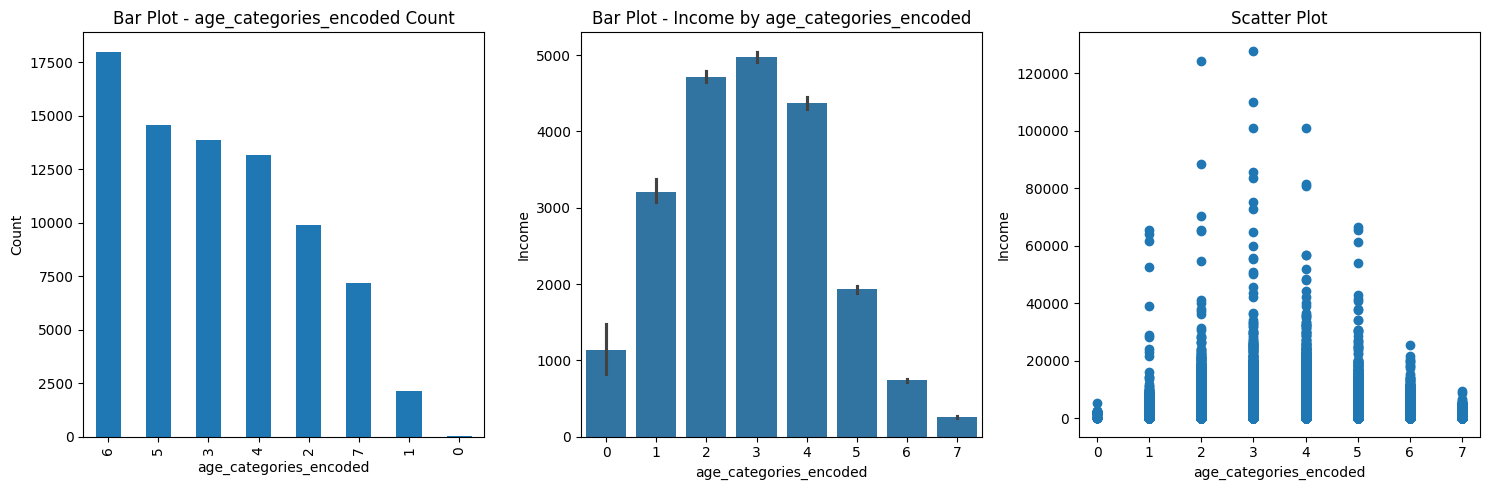

In [38]:
#age_categories_encoded
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['age_categories_encoded'].value_counts().plot.bar()
plt.xlabel('age_categories_encoded')
plt.ylabel('Count')
plt.title('Bar Plot - age_categories_encoded Count')

plt.subplot(1, 3, 2)
sns.barplot(x='age_categories_encoded', y='income', data=income)
plt.xlabel('age_categories_encoded')
plt.ylabel('Income')
plt.title('Bar Plot - Income by age_categories_encoded')

plt.subplot(1, 3, 3)
plt.scatter(income['age_categories_encoded'], income['income'])
plt.xlabel('age_categories_encoded')
plt.ylabel('Income')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

##5. **인코딩**

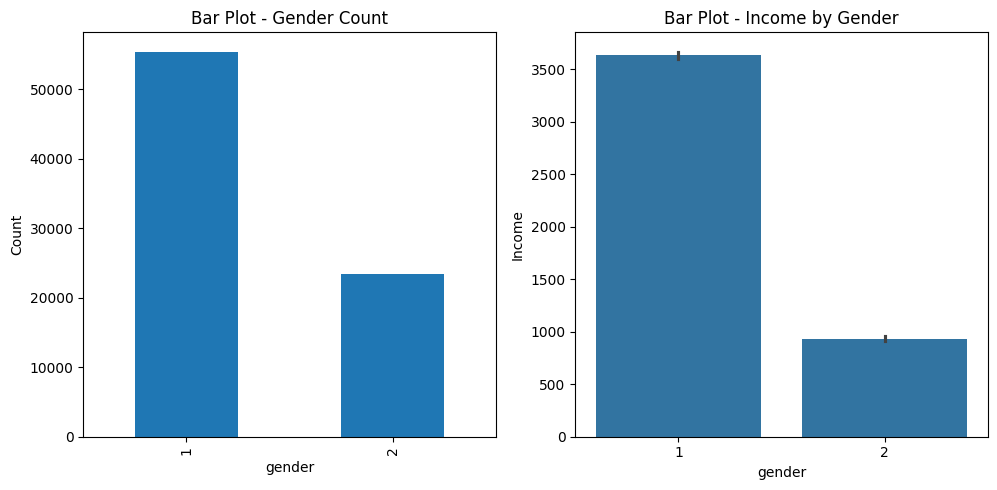

In [39]:
#gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
income['gender'].value_counts().plot.bar()
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Bar Plot - Gender Count')

plt.subplot(1, 3, 2)
sns.barplot(x='gender', y='income', data=income)
plt.xlabel('gender')
plt.ylabel('Income')
plt.title('Bar Plot - Income by Gender')

plt.tight_layout()
plt.show()

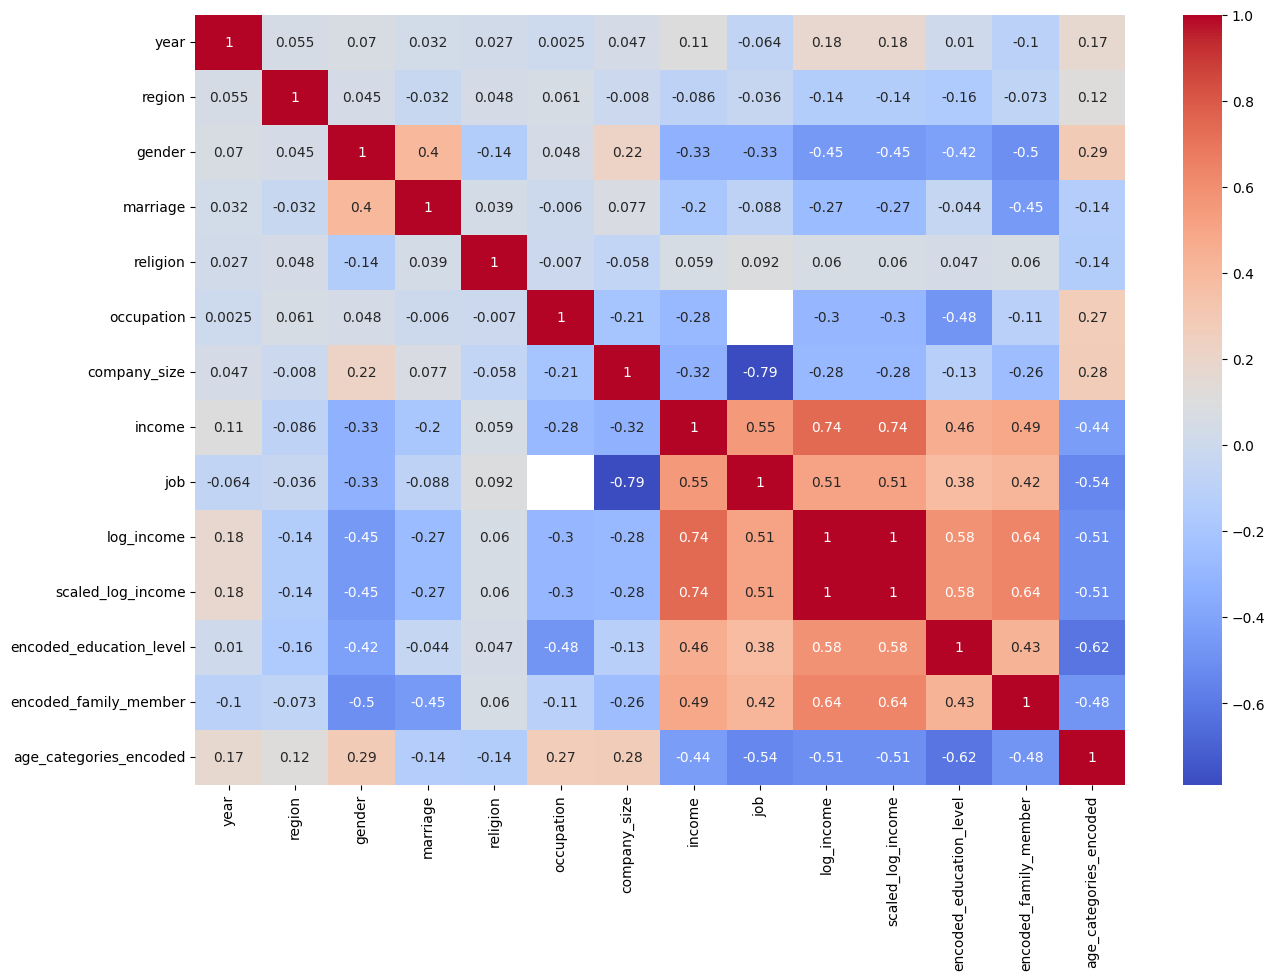

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(income.corr(numeric_only =True), annot=True, cmap="coolwarm")
plt.show()

1) label encoding

2) one-hot encoding

In [41]:
#one-hot encoding: 순서 X region/marriage
income = pd.get_dummies(data=income, columns = ['region', 'marriage','job'], drop_first=True, dtype=int)
income.columns

Index(['year', 'gender', 'religion', 'occupation', 'company_size', 'income',
       'log_income', 'scaled_log_income', 'encoded_education_level',
       'encoded_family_member', 'age_categories_encoded', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
       'marriage_2', 'marriage_3', 'marriage_4', 'marriage_5', 'marriage_6',
       'job_1'],
      dtype='object')

##Submission 파일 전처리

In [64]:
submission.head()

,Unnamed: 0,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,51802,47520101,2015,11,2,1,1,1965,5,3,2,873.0,1.0,NaN,0
1,24685,23120101,2015,11,2,4,1,1970,5,1,2,521.0,1.0,NaN,0
2,20910,19780101,2009,5,4,3,1,1946,5,1,2,NaN,NaN,10.0,0
3,24267,22730101,2005,1,2,4,1,1968,7,1,2,9999.0,10.0,NaN,0
4,71797,63660101,2009,5,4,2,1,1942,3,1,1,611.0,1.0,NaN,0


In [65]:
submission['occupation'] = pd.to_numeric(submission['occupation'])
submission['company_size'] = pd.to_numeric(submission['company_size'])
submission['reason_none_worker'] = pd.to_numeric(submission['reason_none_worker'])

In [66]:
submission.drop('Unnamed: 0', inplace=True, axis=1)
submission.drop('id', inplace=True, axis=1)
submission.drop('wave', inplace=True, axis=1)

In [67]:
submission['age'] = submission['year']-submission['year_born']
submission.drop('year_born', inplace=True, axis=1)

In [68]:
# 'job' 열을 추가하고 초기값으로 -1로 설정합니다.
submission['job'] = -1

# 'reason_none_worker' 열이 공백이 아니면 해당 행의 'job' 열 값을 0으로 설정합니다.
submission.loc[submission['reason_none_worker'].notna(), 'job'] = 0

# 'occupation' 열이 공백이 아니면 해당 행의 'job' 열 값을 1로 설정합니다.
submission.loc[submission['occupation'].notna(), 'job'] = 1

# 'job' 열이 -1인 행을 찾아 가장 빈도가 높은 값으로 대체합니다.
submission.loc[submission['job'] == -1, 'job'] = submission['job'].mode().iloc[0]

In [69]:
# 0, 9를 6으로 교체
submission.loc[submission['marriage'] == 9, 'marriage'] =6
submission.loc[submission['marriage'] == 0, 'marriage'] =6

In [70]:
submission.loc[submission['education_level'] == 1, 'education_level'] = 2 #1과 2는 학력 없음

# 'education_level' 열에서 8 이상의 값을 '8이상'으로 묶어서 새로운 열을 추가합니다.
submission['new_education_level'] = submission['education_level'].apply(lambda x: '8이상' if x >= 8 else str(x))

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'new_family_member' 열에 대해 라벨 인코딩을 수행
submission['encoded_education_level'] = label_encoder.fit_transform(submission['new_education_level'])

submission.drop('education_level', inplace=True, axis=1)
submission.drop('new_education_level', inplace=True, axis=1)
#0=(1,2), 1=3, 2=4, 3=5(고졸), 4=6, 5=7(학사졸업), 6이상=8(석사 이상)

In [71]:
submission['occupation'] = submission['occupation'].apply(lambda x: int(x / 100) if not pd.isna(x) else np.nan)
submission.loc[submission['occupation'] == 99.0, 'occupation'] = 9
submission.loc[submission['occupation'].isna(), 'occupation'] = 11

In [72]:
submission.drop('reason_none_worker', inplace=True, axis=1)

In [73]:
submission.company_size = submission.company_size.replace(99.0, 7)
submission['company_size'].fillna(11, inplace=True)

In [74]:
# 'family_member' 열에서 5 이상의 값을 '5이상'으로 묶어서 새로운 열을 추가합니다.
submission['new_family_member'] = submission['family_member'].apply(lambda x: '5이상' if x >= 5 else str(x))

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'new_family_member' 열에 대해 라벨 인코딩을 수행
submission['encoded_family_member'] = label_encoder.fit_transform(submission['new_family_member'])

submission.drop('family_member', inplace=True, axis=1)
submission.drop('new_family_member', inplace=True, axis=1)
#0:1명, 1:2명, 2:3명, 3:4명, 4:5명 이상으로 인코딩 (5명 이상은 각 빈도수가 매우 적어서 이들끼리만 하나로 묶음)

In [75]:
# 나이를 8개의 범주로 나누기
bins = [10, 20, 30, 40, 50, 60, 70, 80, 120]  # 각 연령대의 경계값 설정
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대이상']  # 범주의 레이블 설정

# cut 함수를 사용하여 나이를 범주로 변환하여 새로운 열로 추가
submission['age_categories'] = pd.cut(submission['age'], bins=bins, labels=labels, right=False)

# age 열 삭제
submission.drop('age', axis=1, inplace=True)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# age_categories 열을 라벨 인코딩하여 숫자로 변환
submission['age_categories_encoded'] = label_encoder.fit_transform(submission['age_categories'])
submission.drop('age_categories', axis=1, inplace=True)

#0=1(10대), 1=2(20대), 2=3(30대), 3=4(40대), 4=5(50대), 5=6(60대), 6=7(70대), 7=8(80대 이상)

In [76]:
#one-hot encoding: 순서 X region/marriage/job
submission = pd.get_dummies(data=submission, columns = ['region', 'marriage','job'], drop_first=True, dtype=int)

In [77]:
submission.drop('income', inplace=True, axis=1)

In [78]:
submission.columns

Index(['year', 'gender', 'religion', 'occupation', 'company_size',
       'encoded_education_level', 'encoded_family_member',
       'age_categories_encoded', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'region_7', 'marriage_2', 'marriage_3',
       'marriage_4', 'marriage_5', 'marriage_6', 'job_1'],
      dtype='object')

In [58]:
income.columns

Index(['year', 'gender', 'religion', 'occupation', 'company_size', 'income',
       'log_income', 'scaled_log_income', 'encoded_education_level',
       'encoded_family_member', 'age_categories_encoded', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
       'marriage_2', 'marriage_3', 'marriage_4', 'marriage_5', 'marriage_6',
       'job_1'],
      dtype='object')

##submission에 대한 예측

In [59]:
# 독립변수와 종속변수 분리
y = income.scaled_log_income
x = income.drop(['scaled_log_income','income','log_income'], axis=1)

# train 데이터와 test 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27, shuffle=True)

- 하이퍼파라미터 그리드 서치

In [60]:
# 하이퍼파라미터 그리드 서치
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END 

- 모델 성능 확인

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

best_parameters = {
    'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0
}
optimal_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=best_parameters['n_estimators'],
    learning_rate=best_parameters['learning_rate'],
    max_depth=best_parameters['max_depth'],
    subsample=best_parameters['subsample'],
    colsample_bytree=best_parameters['colsample_bytree']
)

optimal_xgb_model.fit(x_train, y_train)
y_test_pred = optimal_xgb_model.predict(x_test)
# 결과 출력
print('훈련 데이터의 점수 : {:.3f}'.format(optimal_xgb_model.score(x_train, y_train)))
print('테스트 데이터의 점수 : {:.3f}'.format(optimal_xgb_model.score(x_test, y_test)))

from sklearn.metrics import r2_score, mean_squared_error
y_pred = optimal_xgb_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# R² 계산
r_squared = r2_score(y_test, y_pred)

print('테스트 데이터의 R²:', r_squared)
print('RMSE: {:.3f}'.format(rmse))

훈련 데이터의 점수 : 0.773
테스트 데이터의 점수 : 0.721
테스트 데이터의 R²: 0.7207848450004336
RMSE: 0.529


- submission 예측 결과 import

In [80]:
from xgboost import XGBRegressor

y=income.scaled_log_income
x=income.drop(['scaled_log_income','income','log_income'],axis=1)

model = XGBRegressor(random_state=42)

best_parameters = {
    'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0
}
optimal_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=best_parameters['n_estimators'],
    learning_rate=best_parameters['learning_rate'],
    max_depth=best_parameters['max_depth'],
    subsample=best_parameters['subsample'],
    colsample_bytree=best_parameters['colsample_bytree']
)

optimal_xgb_model.fit(x,y)

input = submission.values
pred_log_scale = optimal_xgb_model.predict(input)

pred_log = scaler.inverse_transform(pred_log_scale.reshape(-1,1))
pred = np.exp(pred_log) - 1
submission['income'] = pred

submission.to_csv("./submission_team1.csv", index=False)

# feature importance

In [ ]:
# 최적 모델 가져오기
best_model = grid_search.best_estimator_

# 특성 중요도 가져오기
feature_importance = best_model.feature_importances_

# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=x_train.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()